In [ ]:
#| hide
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2

In [ ]:
#| hide
from nbdev_proteomics.core import *
from nbdev_proteomics.dim_red import *
from nbdev_proteomics.impute_missing import *
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
#| hide
import warnings
warnings.filterwarnings("ignore")

# nbdev-proteomics

> process proteomic quantification

A collection of utilities to process proteomics data

## Install

```sh
pip install nbdev_proteomics
```

## How to use

Let's start by uploading a dataset from a DIA-NN analysis

In [ ]:
# Initialize the class with the DIA-NN output file
# a table to rename the columns and a peptide counts file
processor = DIAnnProcessor(
    "../toy_datasets/DIA-NN_output.txt",
    "../toy_datasets/DIA-NN_peptides_counts.txt",
    "../toy_datasets/DIA-NN_column_mapping.csv",
)

# Process the file and get the filtered protein quantification DataFrame
filtered_quantification = processor.process()
filtered_quantification.head()

use dia-nn


,WT_1.1,WT_1.2,WT_1.3,MUT3_1.1,MUT3_1.2,MUT3_1.3,MUT4_1.1,MUT4_1.2,MUT4_1.3,WTSOL_2.1,...,WTSOL_3.6,WTINS_3.4,WTINS_3.5,WTINS_3.6,MUT4SOL_3.1,MUT4SOL_3.2,MUT4SOL_3.3,MUT4INS_3.1,MUT4INS_3.2,MUT4INS_3.3
GFP.BLA,NaN,NaN,NaN,9.937347e+06,1.068154e+07,9.845878e+06,9.728128e+06,1.024333e+07,9.316970e+06,NaN,...,NaN,NaN,NaN,NaN,5.944689e+06,6.888683e+06,6.956789e+06,NaN,NaN,NaN
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,3.090158e+06,2.574684e+06,2.751917e+06,2.333518e+06,2.596232e+06,2.407138e+06,2.508370e+06,2.562637e+06,2.565928e+06,2.804626e+06,...,3.112300e+06,1.033351e+06,9.194551e+05,1.039817e+06,2.824497e+06,2.757964e+06,2.403540e+06,1.216043e+06,1.053073e+06,1.048340e+06
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,3.413114e+07,3.177892e+07,3.289960e+07,2.989977e+07,3.003979e+07,3.027149e+07,3.146555e+07,3.074012e+07,3.075175e+07,3.512207e+07,...,3.574694e+07,1.975402e+06,1.821761e+06,1.814954e+06,3.279010e+07,3.208254e+07,3.190298e+07,1.931748e+06,1.978563e+06,1.991076e+06
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,4.962111e+06,5.049931e+06,4.865019e+06,4.767877e+06,4.826146e+06,4.738838e+06,4.982286e+06,4.989706e+06,4.672616e+06,6.168714e+05,...,1.333413e+06,8.680057e+06,8.580248e+06,8.776530e+06,1.135220e+06,9.074091e+05,9.992258e+05,8.560026e+06,8.473488e+06,8.810763e+06
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,3.773686e+07,3.370411e+07,2.815374e+07,2.328151e+07,2.889554e+07,3.085169e+07,3.111706e+07,3.134872e+07,2.640844e+07,4.603374e+06,...,8.123416e+06,8.085395e+07,8.397210e+07,8.286466e+07,6.640407e+06,7.224879e+06,7.921410e+06,8.585187e+07,8.267973e+07,8.537414e+07


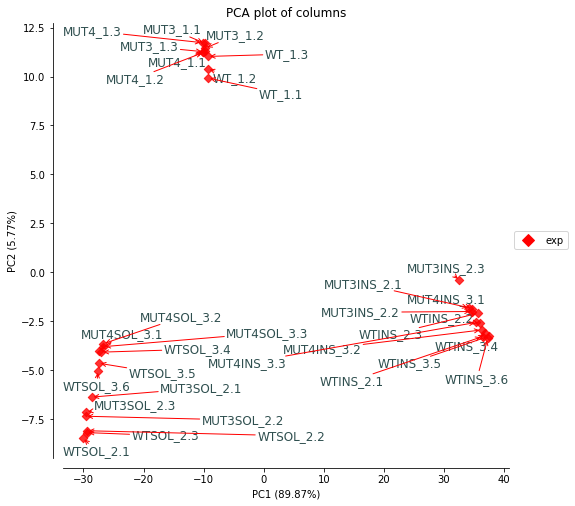

In [ ]:
colors = ['r']*filtered_quantification.shape[1]
color_to_label = {'r': 'exp'}
plot_pca_columns(np.log2(filtered_quantification).dropna(), colors,color_to_label, figsize=(8,8))

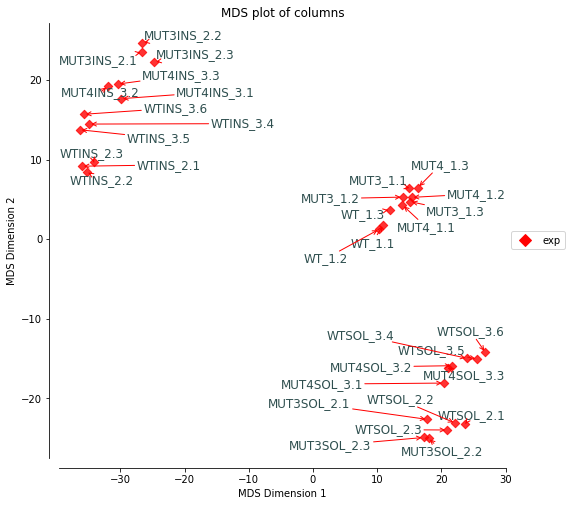

In [ ]:
colors = ['r']*filtered_quantification.shape[1]
color_to_label = {'r': 'exp'}
plot_mds_columns(np.log2(filtered_quantification).dropna(), colors, color_to_label, figsize=(8,8))

## exctract a subset of the dataframe

In [ ]:
df = filtered_quantification.iloc[:,:6]
print(df.shape)
df = df.dropna(how='all',axis=1)
print(df.shape)
df.head()

(6243, 6)
(6243, 6)


,WT_1.1,WT_1.2,WT_1.3,MUT3_1.1,MUT3_1.2,MUT3_1.3
GFP.BLA,NaN,NaN,NaN,9.937347e+06,1.068154e+07,9.845878e+06
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,3.090158e+06,2.574684e+06,2.751917e+06,2.333518e+06,2.596232e+06,2.407138e+06
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,3.413114e+07,3.177892e+07,3.289960e+07,2.989977e+07,3.003979e+07,3.027149e+07
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,4.962111e+06,5.049931e+06,4.865019e+06,4.767877e+06,4.826146e+06,4.738838e+06
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,3.773686e+07,3.370411e+07,2.815374e+07,2.328151e+07,2.889554e+07,3.085169e+07


In [ ]:
df.describe()

,WT_1.1,WT_1.2,WT_1.3,MUT3_1.1,MUT3_1.2,MUT3_1.3
count,6.121000e+03,6.100000e+03,6.103000e+03,6.093000e+03,6.107000e+03,6.116000e+03
mean,3.599249e+07,3.543187e+07,3.535706e+07,3.248318e+07,3.240360e+07,3.263686e+07
std,3.026840e+08,2.929701e+08,3.003849e+08,2.607200e+08,2.501787e+08,2.565394e+08
min,3.204720e+04,6.152255e+04,3.883329e+04,6.272731e+04,9.318066e+04,8.053832e+04
25%,2.071758e+06,2.104831e+06,2.123954e+06,2.055398e+06,2.105090e+06,2.034196e+06
50%,4.921638e+06,4.928115e+06,4.907622e+06,4.794456e+06,4.868387e+06,4.816218e+06
75%,1.327099e+07,1.310617e+07,1.300904e+07,1.269331e+07,1.262831e+07,1.285196e+07
max,1.643516e+10,1.617111e+10,1.550483e+10,1.319888e+10,1.241172e+10,1.318592e+10


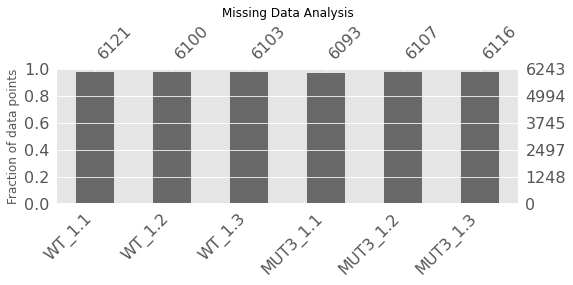

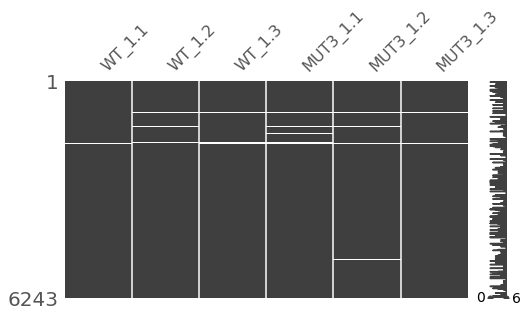

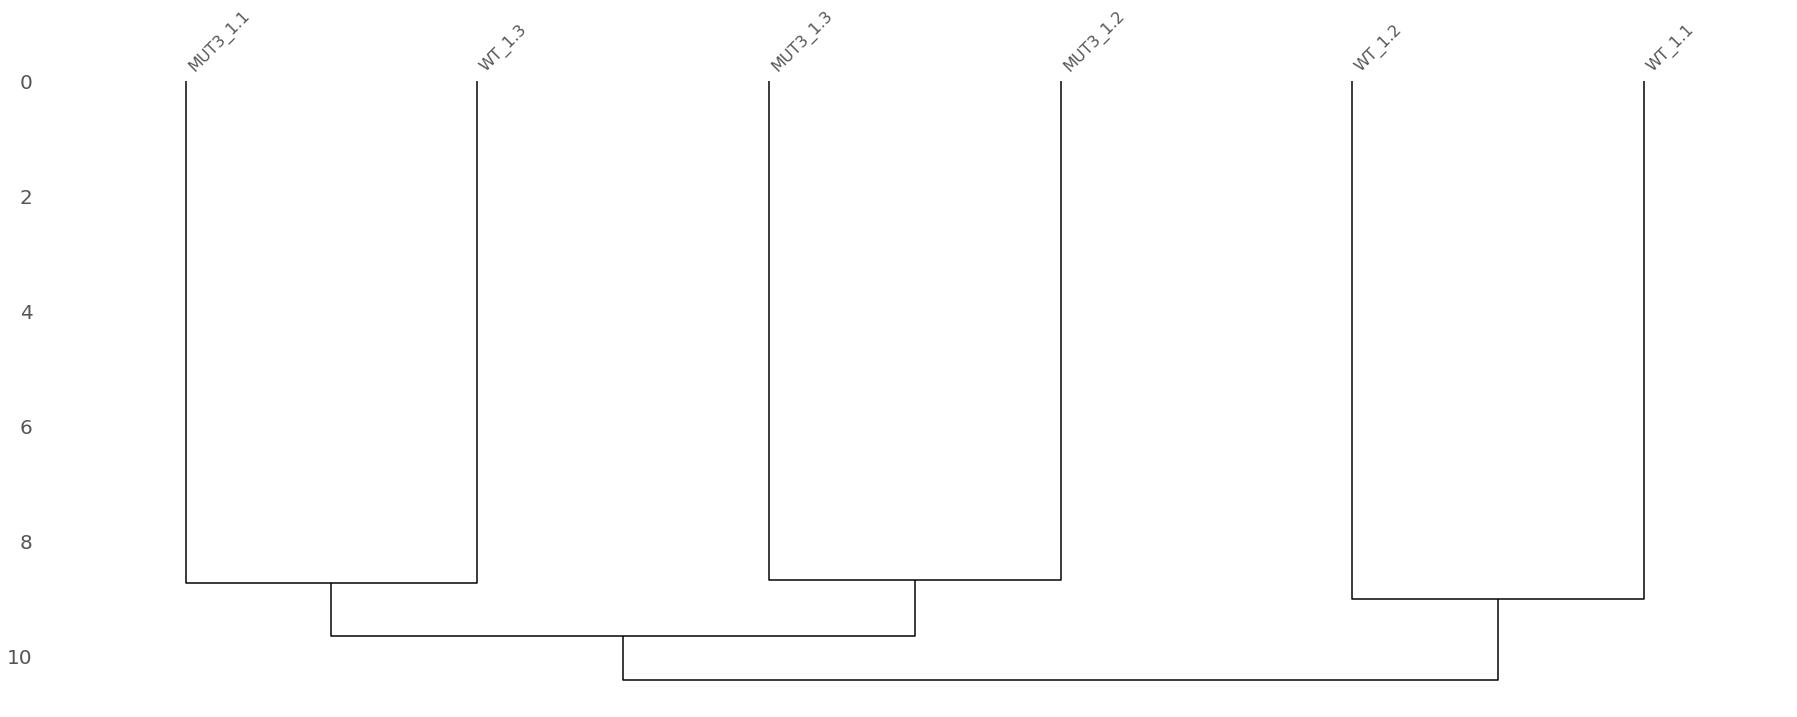

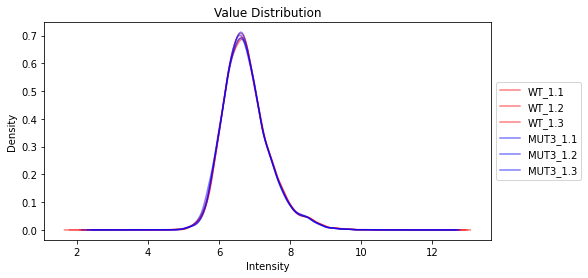

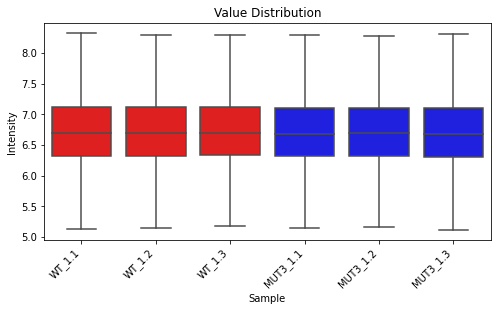

In [ ]:
dataset_viz = DatasetViz(df = df, palette = ['r']*3+['b']*3)
dataset_viz.analyse_missing_values(figsize=(8,4))
dataset_viz.analyse_values_distribution(figsize=(8,4))

WT_1.1      4.921638e+06
WT_1.2      4.928115e+06
WT_1.3      4.907622e+06
MUT3_1.1    4.794456e+06
MUT3_1.2    4.868387e+06
MUT3_1.3    4.816218e+06
dtype: float64
4872739.30693322
WT_1.1      0.990065
WT_1.2      0.988763
WT_1.3      0.992892
MUT3_1.1    1.016328
MUT3_1.2    1.000894
MUT3_1.3    1.011736
dtype: float64


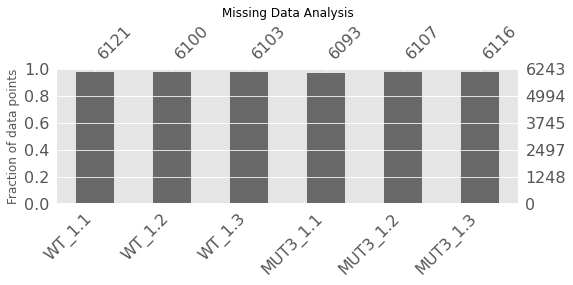

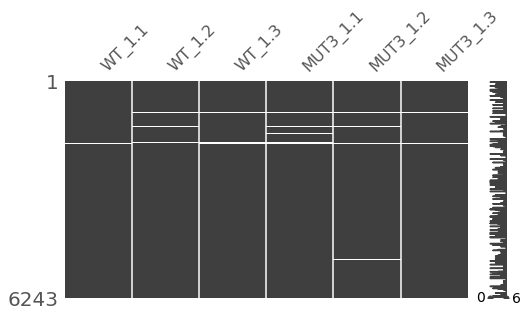

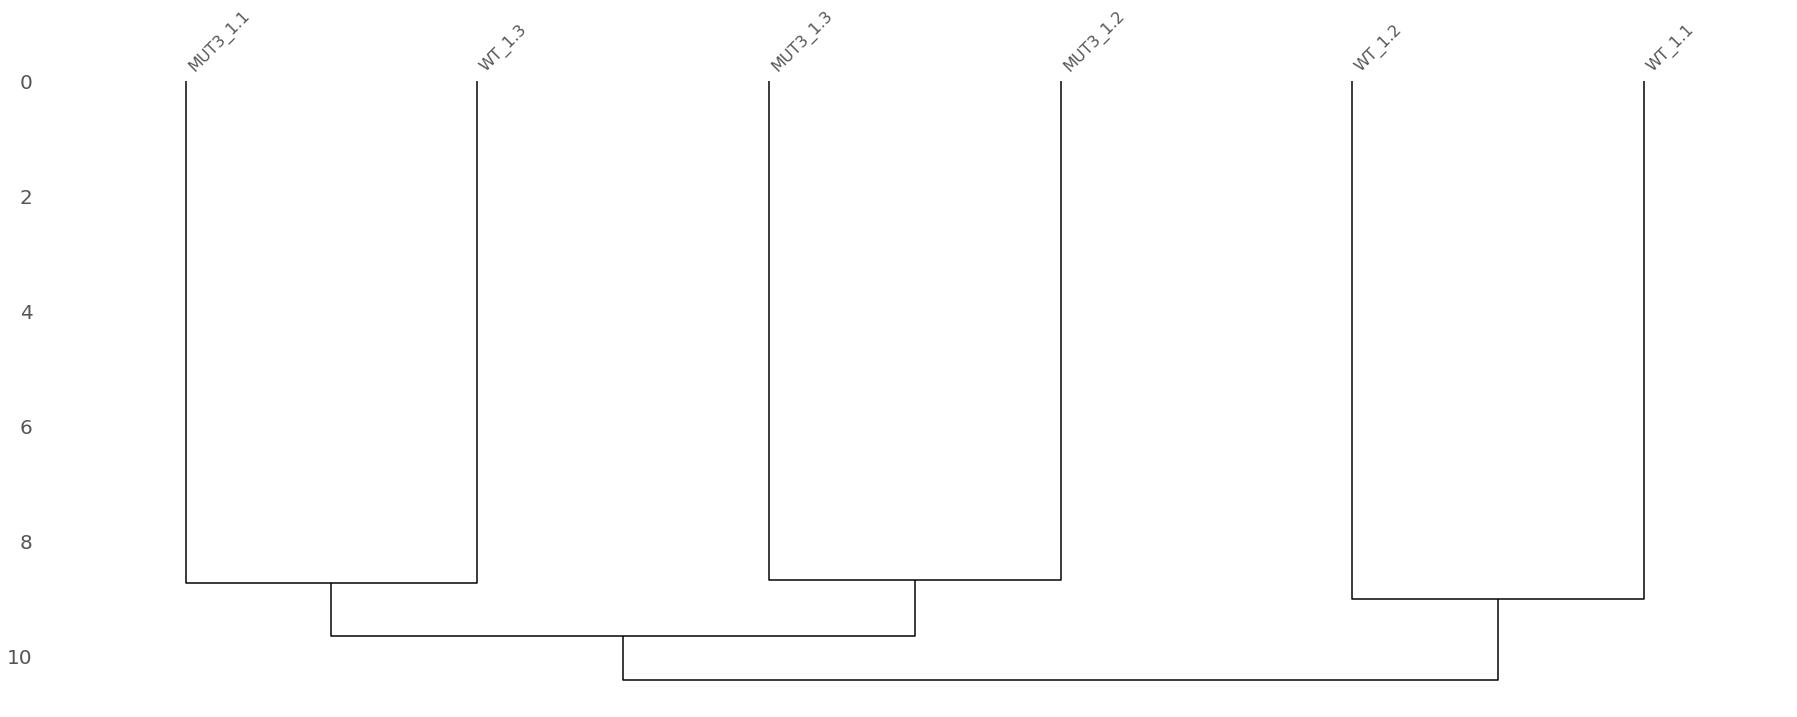

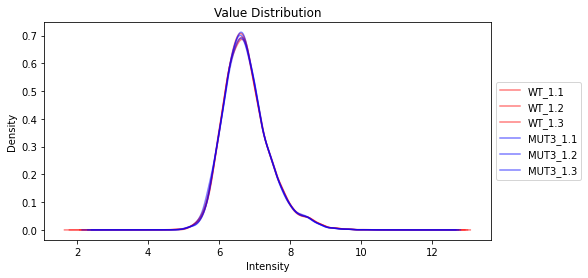

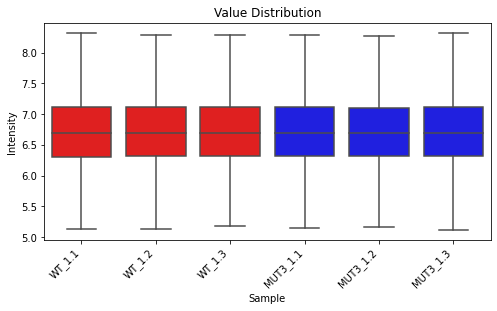

In [ ]:
df_norm_load = norm_loading(df)
dataset_viz = DatasetViz(df = df_norm_load, palette = ['r']*3+['b']*3)
dataset_viz.analyse_missing_values(figsize=(8,4))
dataset_viz.analyse_values_distribution(figsize=(8,4))

In [ ]:
df_norm_load.describe()

,WT_1.1,WT_1.2,WT_1.3,MUT3_1.1,MUT3_1.2,MUT3_1.3
count,6.121000e+03,6.100000e+03,6.103000e+03,6.093000e+03,6.107000e+03,6.116000e+03
mean,3.563489e+07,3.503373e+07,3.510575e+07,3.301356e+07,3.243256e+07,3.301988e+07
std,2.996768e+08,2.896781e+08,2.982498e+08,2.649770e+08,2.504023e+08,2.595501e+08
min,3.172880e+04,6.083124e+04,3.855726e+04,6.375152e+04,9.326396e+04,8.148349e+04
25%,2.051175e+06,2.081180e+06,2.108857e+06,2.088959e+06,2.106972e+06,2.058069e+06
50%,4.872739e+06,4.872739e+06,4.872739e+06,4.872739e+06,4.872739e+06,4.872739e+06
75%,1.313913e+07,1.295890e+07,1.291657e+07,1.290056e+07,1.263960e+07,1.300279e+07
max,1.627187e+10,1.598940e+10,1.539462e+10,1.341439e+10,1.242281e+10,1.334066e+10


fill na with detection_limit: 116342.31145379972 5.065737687979267 Index(['WT_1.1', 'WT_1.2', 'WT_1.3'], dtype='object')
fill na with detection_limit: 128099.10559899165 5.107546097466946 Index(['MUT3_1.1', 'MUT3_1.2', 'MUT3_1.3'], dtype='object')


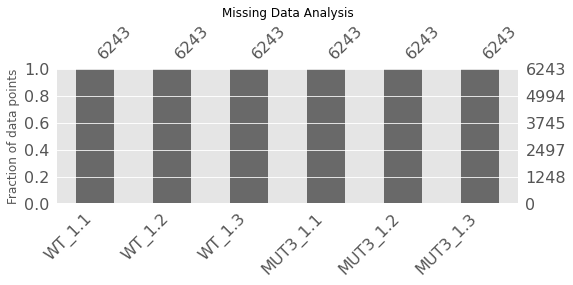

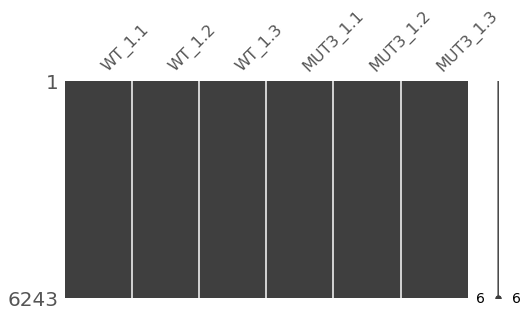

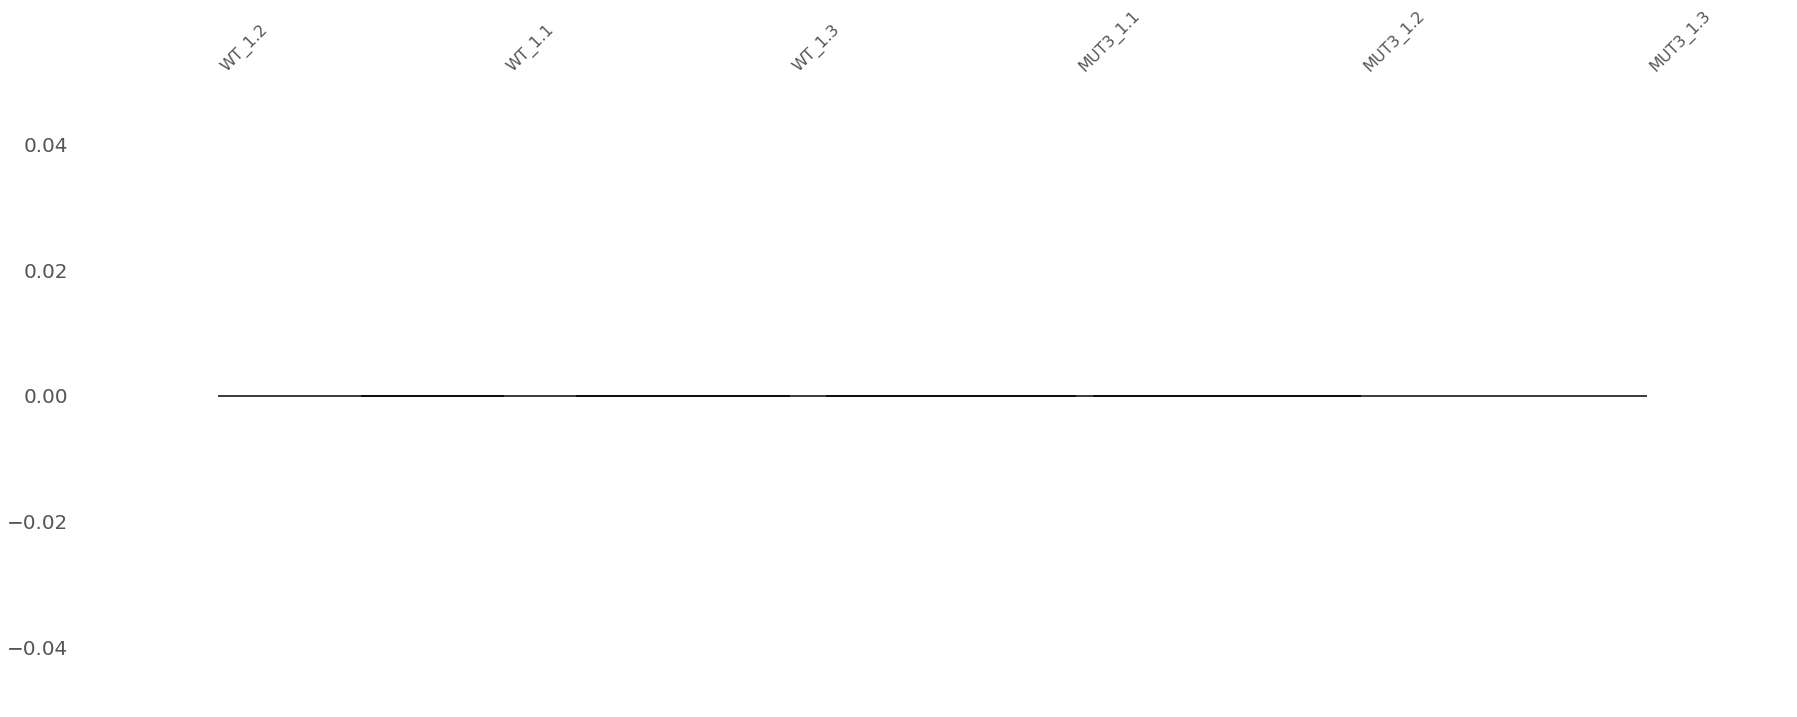

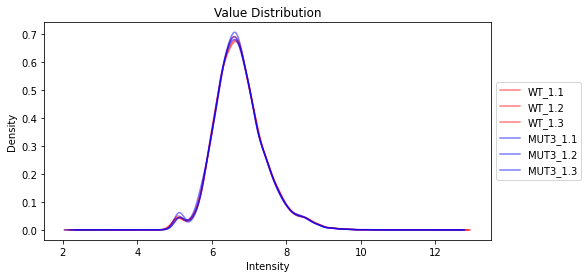

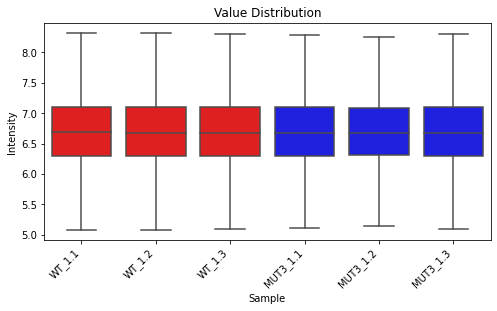

In [ ]:
df_norm_load_imputed = impute_proteomics_data(df_norm_load, ['A','A','A','B','B','B'])
dataset_viz = DatasetViz(df = df_norm_load_imputed,palette = ['r']*3+['b']*3)
dataset_viz.analyse_missing_values(figsize=(8,4))
dataset_viz.analyse_values_distribution(figsize=(8,4))

In [ ]:
df_norm_load_imputed.describe()

,WT_1.1,WT_1.2,WT_1.3,MUT3_1.1,MUT3_1.2,MUT3_1.3
count,6.243000e+03,6.243000e+03,6.243000e+03,6.243000e+03,6.243000e+03,6.243000e+03
mean,3.500385e+07,3.428577e+07,3.435545e+07,3.223566e+07,3.174944e+07,3.236610e+07
std,2.967683e+08,2.863835e+08,2.949284e+08,2.618208e+08,2.477018e+08,2.569362e+08
min,5.828539e+04,7.446140e+04,6.129801e+04,6.644884e+04,5.337315e+04,8.427987e+04
25%,1.973416e+06,1.957926e+06,1.994725e+06,1.993400e+06,2.034857e+06,1.977900e+06
50%,4.810964e+06,4.729558e+06,4.746362e+06,4.700474e+06,4.700683e+06,4.711367e+06
75%,1.285453e+07,1.278215e+07,1.271491e+07,1.244475e+07,1.227793e+07,1.252151e+07
max,1.627187e+10,1.598940e+10,1.539462e+10,1.341439e+10,1.242281e+10,1.334066e+10


In [ ]:
imputed_selection_normed = np.log2(df_norm_load_imputed)

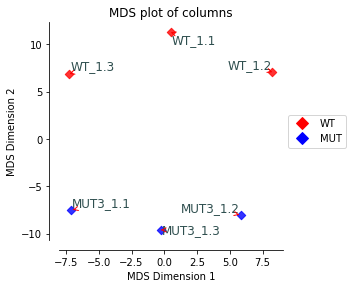

In [ ]:
colors = ['r']*3+['b']*3
color_to_label = {'r': 'WT', 'b': 'MUT'}
plot_mds_columns(imputed_selection_normed, colors, color_to_label)

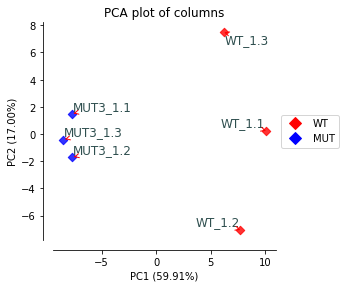

In [ ]:
plot_pca_columns(imputed_selection_normed, colors, color_to_label)

In [ ]:
imputed_selection_normed.describe()

,WT_1.1,WT_1.2,WT_1.3,MUT3_1.1,MUT3_1.2,MUT3_1.3
count,6243.000000,6243.000000,6243.000000,6243.000000,6243.000000,6243.000000
mean,22.403594,22.382280,22.377914,22.359599,22.385108,22.371003
std,2.261674,2.252626,2.247010,2.249750,2.203008,2.242486
min,15.830847,16.184205,15.903553,16.019956,15.703827,16.362901
25%,20.912263,20.900894,20.927758,20.926800,20.956496,20.915538
50%,22.197895,22.173274,22.178391,22.164375,22.164439,22.167714
75%,23.615773,23.607625,23.600017,23.569034,23.549561,23.577906
max,33.921661,33.896397,33.841707,33.643062,33.532273,33.635111


In [ ]:
imputed_selection_normed.head()

,WT_1.1,WT_1.2,WT_1.3,MUT3_1.1,MUT3_1.2,MUT3_1.3
GFP.BLA,17.350618,16.877316,17.281742,23.267795,23.349905,23.247921
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,21.544844,21.279661,21.381715,21.177441,21.309277,21.215720
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,25.010180,24.905264,24.961276,24.856997,24.841660,24.868289
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,22.228117,22.251529,22.203723,22.208281,22.203729,22.192934
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,25.155066,24.990118,24.736532,24.496047,24.785633,24.895679


In [ ]:
%%R
library("limma")

limma_differential_expression <- function(df, replicates_A, replicates_B) {
  # Define sample groups
  sample_groups <- factor(
    c(rep("A", replicates_A), rep("B", replicates_B)),
    levels = c("A", "B")
  )

  # Create a design matrix
  design_matrix <- model.matrix(~0 + sample_groups)
  colnames(design_matrix) <- c("A", "B")

  # Fit a linear model to the data
  lm_fit <- lmFit(df, design_matrix)

  # Define contrasts (comparisons between groups)
  contrast_matrix <- makeContrasts("B-A", levels = design_matrix)

  # Fit the contrasts to the linear model
  contrasted_fit <- contrasts.fit(lm_fit, contrast_matrix)

  # Apply empirical Bayes smoothing
  ebayes_fit <- eBayes(contrasted_fit)

  # Extract results without sorting and return all rows
  results <- topTable(ebayes_fit, coef = 1, sort.by = "none", number = Inf)

  return(results)
}

In [ ]:
%%R -i imputed_selection_normed
results <- limma_differential_expression(imputed_selection_normed, 3, 3)
head(results)

                                                logFC  AveExpr          t
GFP.BLA                                    6.11864849 20.22922 47.3293349
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1 -0.16792710 21.31811 -2.1050623
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1 -0.10325758 24.90728 -2.3404239
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1 -0.02614141 22.21472 -0.6920798
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1 -0.23478582 24.84318 -1.6221870
Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1 -0.05630553 26.25538 -0.7968936
                                               P.Value    adj.P.Val         B
GFP.BLA                                   7.631331e-09 0.0000150629 10.199640
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1 8.067602e-02 0.2250493179 -5.509594
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1 5.850568e-02 0.1864476665 -5.178813
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1 5.151720e-01 0.6812580102 -7.165282
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1 1.567006e-01 0.3291661121 -6.166449
Tb05.5K5.150:m

In [ ]:
%R -o results
results

,logFC,AveExpr,t,P.Value,adj.P.Val,B
GFP.BLA,6.118648,20.229216,47.329335,7.631331e-09,0.000015,10.199640
Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,-0.167927,21.318110,-2.105062,8.067602e-02,0.225049,-5.509594
Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,-0.103258,24.907278,-2.340424,5.850568e-02,0.186448,-5.178813
Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,-0.026141,22.214719,-0.692080,5.151720e-01,0.681258,-7.165282
Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,-0.234786,24.843179,-1.622187,1.567006e-01,0.329166,-6.166449
...,...,...,...,...,...,...
Tb927.9.9870:mRNA-p1,0.021158,23.977410,0.505039,6.318267e-01,0.766390,-7.288104
Tb927.9.9940:mRNA-p1,0.110974,26.507374,2.625228,3.991415e-02,0.154869,-4.777352
Tb927.9.9950:mRNA-p1,0.086074,19.670132,0.734206,4.909454e-01,0.663127,-7.133060
Tb927.9.9960:mRNA-p1,-0.265460,21.796494,-6.330320,7.743785e-04,0.022843,-0.428122


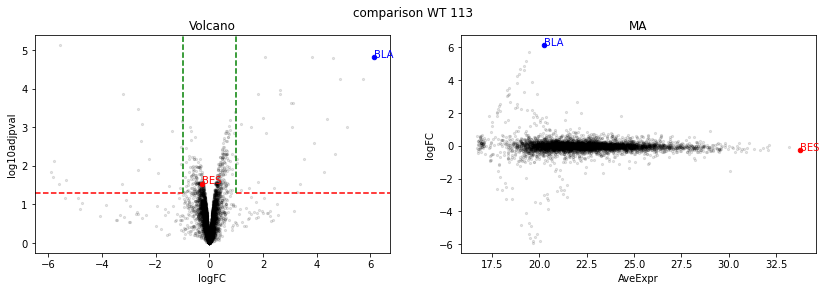

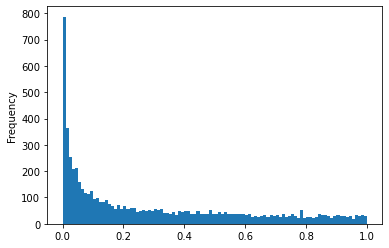

In [ ]:
plot_volcano_ma(results, "comparison WT 113", 
                protein_indices=['GFP.BLA','Tb427.BES40.22'], 
                protein_ids=['BLA','BES'], protein_colors=['b','r'])
